# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 1 - Newton

### Use the Newton's method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define the function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$ and its derivative $df$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        # Hint: return ...
        # ===== 請實做程式 =====
        return np.cosh(x)+np.cos(x)-c
        # ====================
    return f

def df(x):
    # Hint: return ...
    # ===== 請實做程式 =====
    return np.sinh(x)-np.sin(x)
    # ====================

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1
assert df(0) == 0

### 2. Implement the algorithm

In [21]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    # ===== 請實做程式 =====
    # Set the initial conditions
   # Set the initial conditions
    x_n = x_0
    num_iterations = 0
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}
    
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
        # Find the differential value of f'(x_n)
        d_f_of_x_n = d_func(x_n)
        
        # Avoid zero derivative
        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            if report_history:
                x_n, history
            else:
                return x_n
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = x_n - f_of_x_n / d_f_of_x_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
    # ====================

Test your implementation with the assertion below.

In [6]:
root = newton(
    lambda x: x**2 - x - 1, 
    lambda x: 2*x - 1, 
    1.2, 
    max_iterations=100, 
    tolerance=1e-7, 
    report_history=False
)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

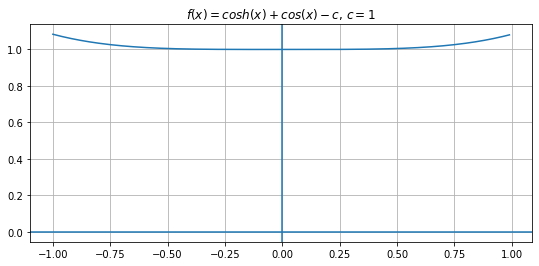

In [7]:
c = 1
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-1.0, 1.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
# ===== 請實做程式 =====
root = None
# ====================

In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

According to the figure as above showing that the minimal value of the function is strictly greater than  0 , this function does not have zero in real number and thus our method faild to find the zero.

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

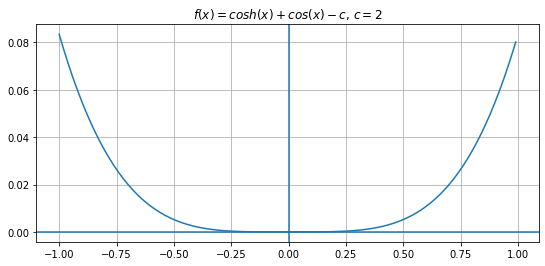

In [10]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-1.0, 1.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [11]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 0
# ====================

In [12]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

By chosing the perfect guess $x=0$, we conform that it is the correct solution.

In [13]:
print(newton(
    f,
    df,
    x_0 = 0,
    tolerance=1e-10
))

0


---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

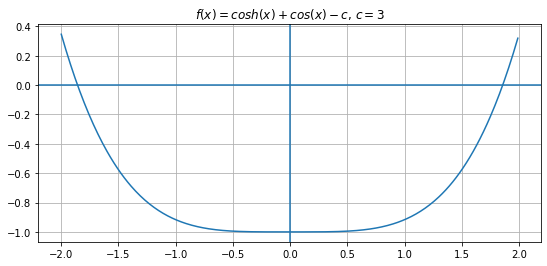

In [14]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.0, 2.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [15]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 1.8579208, -1.8579208
# ====================

In [16]:
print('My estimation of root:', root)


My estimation of root: (1.8579208, -1.8579208)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

請點此cell兩下開始作答（如要打文字記得選Markdown, 寫程式則選Code, 一個cell不夠可以再新增在下方）

In [22]:
solution, history = newton(
    f,
    df,
    x_0 = 2,
    tolerance=1e-10,
    max_iterations=100,
    report_history=True
)

print(solution)

Found solution after 4 iterations.
1.8579208291501987


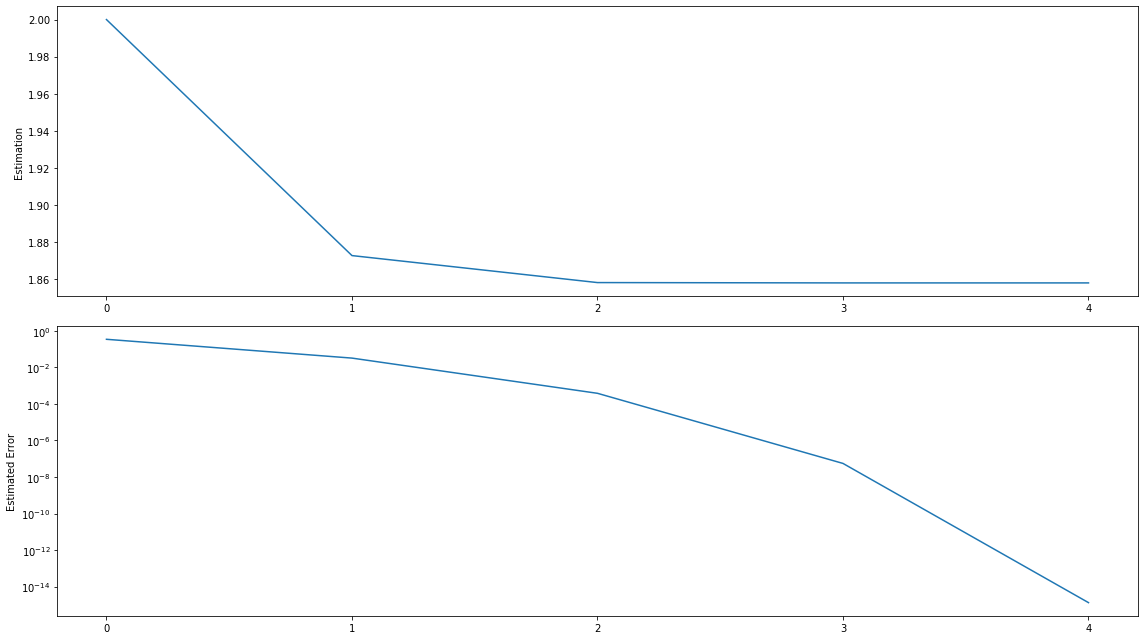

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [25]:
solution, history = newton(
    f,
    df,
    x_0 = -2,
    tolerance=1e-10,
    max_iterations=100,
    report_history=True
)

Found solution after 4 iterations.


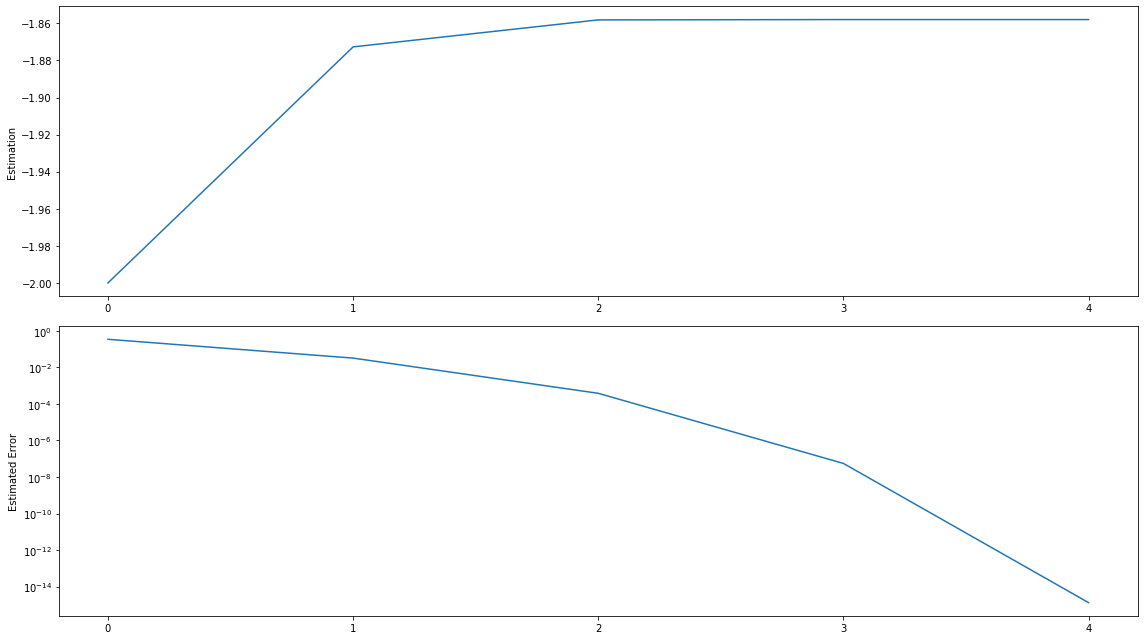

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

For  𝑐=1, the Newton method does not work since the requirement dose not satisfied but for $c=1,2$ it does work and work perfectly as the hand-on cases stated "converge very quickly".